In [1]:
import utils
from utils import *

def default_params():
    """ These are the default parameters used in the framework. """
    return {
            # Runner parameters
            'max_steps': 120,
            'num_episodes': 1,
            'num_actions': 7, 
            # 'start_action': 0, 
            'correct_action': 5,    # Zero indexed 
            # Optimization parameters
            'alpha': 0.5,
            'alpha_decay': 40,
            'alpha_min': 0.001,
            # Exploration parameters
            'epsilon': 1,
            'epsilon_decay': 20,
            'epsilon_min': 0.01,    
            'gamma': 0.95,
            'plots': False,
            'noise': False,
            'surrogate': False,
            'surrogate_c_interval': 50,
            'surrogate_c_interval_min': 0,
           }

## Thompson sampling

In [2]:
import numpy as np
from scipy.stats import beta

class ThompsonSamplingAgent:
    def __init__(self, num_actions, reward_range):
        self.num_actions = num_actions
        self.alpha = np.ones(num_actions)  # Initialize alpha (successes) to 1
        self.beta = np.ones(num_actions)   # Initialize beta (failures) to 1
        self.reward_range = reward_range
        

    def choose_action(self):
        sampled_rewards = np.random.beta(self.alpha, self.beta)
        action = np.argmax(sampled_rewards)
        # print('a: ',action)
        return action

    def observe_reward(self, action, reward):
        # print('r: ', reward)
        # Update the Beta distribution parameters based on observed reward
        normalized_reward = (reward - self.reward_range[0]) / (self.reward_range[1] - self.reward_range[0])
        self.alpha[action] += normalized_reward
        self.beta[action] += 1 - normalized_reward

# Define the number of actions and reward range
num_actions = 7
reward_range = (-6, 0)

# Create a Thompson Sampling agent
agent = ThompsonSamplingAgent(num_actions, reward_range)

# Number of time steps
num_steps = 1000

# Main loop for interaction
for t in range(num_steps):
    # Choose an action
    chosen_action = agent.choose_action()
    
    # Simulate a reward (replace with actual reward from your environment)
    true_rewards = np.random.uniform(reward_range[0], reward_range[1], num_actions)
    observed_reward = true_rewards[chosen_action]
    
    # Observe the reward and update the agent
    agent.observe_reward(chosen_action, observed_reward)

# After interacting for a sufficient number of time steps, you can select the action with the highest Thompson sample
optimal_action = agent.choose_action()
print("Optimal Action:", optimal_action)


Optimal Action: 3


In [3]:
class ThompsonSamplingAgentTemporaryWrapper(ThompsonSamplingAgent):
    def __init__(self, *args, **kwargs):
        self.epsilon = None
        self.Q = []
        self.N = None
        self.t = None
        super().__init__(*args, **kwargs)
    
    def choose_action(self, state=None):
        return super().choose_action()
    
    def learn(self, state=None, action=None, reward=None, next_state=None):
        return super().observe_reward(action=action, reward=reward)
    
# Define the number of actions and reward range
num_actions = 7

# This whould remain fixed, since the agent needs to know it before being
# initialized. The assumption that this is the theoretical reward range. This
# means it's ok to keep it fixed, since we don't know the true value when we 
# begin.
reward_range = (-6, 0)

# Create a Thompson Sampling agent
agent = ThompsonSamplingAgentTemporaryWrapper(num_actions, reward_range)

params = default_params()

q_values_for_chart, rewards, episode_length, selected_action, reward_processor, alphas, epsilons = runner(agent=agent, params=params)
utils.print_agent_stats(agent)

optimal_action = agent.choose_action()
print("Optimal Action:", optimal_action)

Q-table:
[]
Number of times action was taken:
None
Total timesteps:
None
Optimal Action: 1


100%|██████████| 1/1 [00:00<00:00, 265.61it/s]

Accuracy: 100.0
Mean episode length: 94.0
Last reward processor:
Estimated confusion matrix:


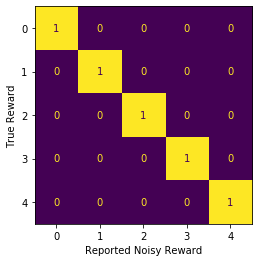

Reward sets:
(0, 0): [-3, -4]
(0, 1): [-3, -4, -2]
(0, 2): [-2, -3, -1, -1]
(0, 3): [0, -1, -2, -1, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -2, 0, 0, -2]
(0, 4): [-1, -1, 0, 0, 0, -1, -1, 0, 0, -1, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, -1, -2, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
(0, 5): [-1, -2, -1, 0, -1, -2, 0, -1, -2, -2, -1, -1]
(0, 6): [-2, -3, -1, -1, -3, -2]
Reward set counts:
Key (0, 0): 2 items
Key (0, 1): 3 items
Key (0, 2): 4 items
Key (0, 3): 18 items
Key (0, 4): 48 items
Key (0, 5): 12 items
Key (0, 6): 6 items


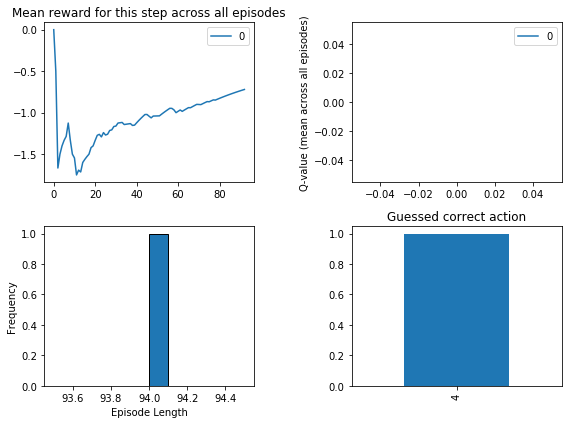

0.0

In [4]:
# q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(learner=agent, params=params)
agent = ThompsonSamplingAgentTemporaryWrapper(num_actions, reward_range)

params_new = {
    # Runner parameters
    'max_steps': 1000,
    'num_episodes': 1,
    'correct_action': 4,
    'noise': True,
    # 'convergence_consecutive_limit': 30,
    #
    'agent': agent,    
    }

params = default_params() | params_new
plot_mean_q_values(params=params)